Assumptions:
    
    i).There must be linear relationship btwn independent and dependent variables
    ii). Mean of residual must be 0 or close to 0
    iii). Varince around the regression line is the same for all values
             of X.
    iv). There should be no multicollinearity
    

Multiple Linear Regression

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("50_Startups.csv")

In [3]:
len(df)

50

In [4]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
df.shape

(50, 5)

Importing required Library

In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

Visualizing Data

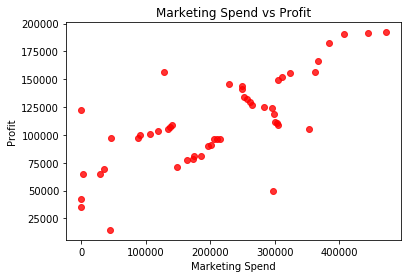

In [7]:
plt.scatter(df['Marketing Spend'],df['Profit'],alpha=0.8,color='red')
plt.title("Marketing Spend vs Profit")
plt.xlabel("Marketing Spend")
plt.ylabel("Profit")
plt.show()

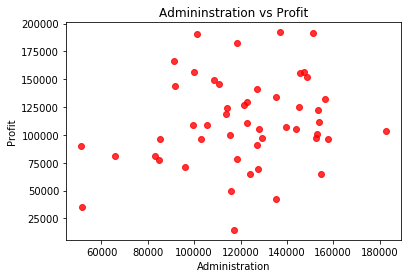

In [8]:
plt.scatter(df['Administration'],df['Profit'],alpha=0.8,color='red')
plt.title("Admininstration vs Profit")
plt.xlabel("Administration")
plt.ylabel("Profit")
plt.show()

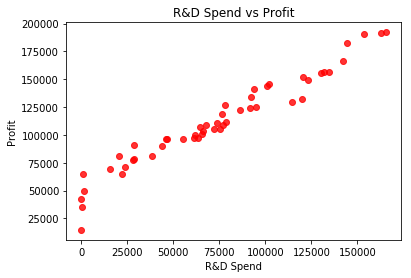

In [9]:
plt.scatter(df['R&D Spend'],df['Profit'],alpha=0.8,color='red')
plt.title("R&D Spend vs Profit")
plt.xlabel("R&D Spend")
plt.ylabel("Profit")
plt.show()

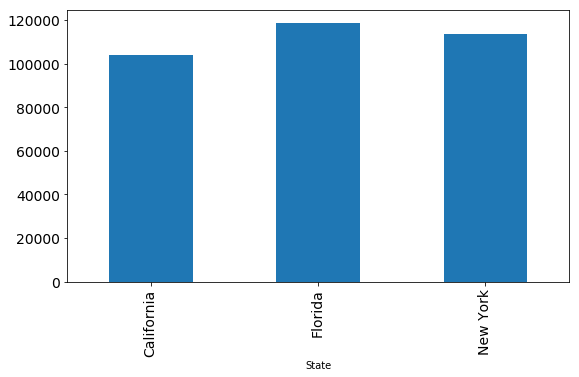

In [10]:
ax=df.groupby(['State'])['Profit'].mean()
ax.plot.bar(figsize=(9,5),fontsize=14)

In [11]:
df.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [12]:
#Creating Dummy Variable
df['NewYork']=np.where(df['State']=="New York",1,0)
df['California']=np.where(df['State']=="California",1,0)
df["Florida"]=np.where(df["State"]=="Florida",1,0)

#Drop State
df.drop(columns=["State"],inplace=True)

In [13]:
dep="Profit"
ind=df.columns.tolist()

#Removing Profit from independent variable
ind.remove(dep)
print(ind)

['R&D Spend', 'Administration', 'Marketing Spend', 'NewYork', 'California', 'Florida']


Splitting the Data

In [14]:
x=df[ind]

y=df[dep]

In [15]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [16]:
#Transforming Data   (helps to better fit the model)
scaler=MinMaxScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

C:\Users\Gaurav\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


# Building the Model

In [17]:
regressor=LinearRegression()
regressor.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Predicting on Test Data

In [18]:
pred=regressor.predict(xtest)

In [19]:
from sklearn.metrics import mean_squared_error
print("     Root Mean Squared Error")
print("---------------------------------")
np.sqrt(mean_squared_error(pred,ytest))

     Root Mean Squared Error
---------------------------------


9137.990152794935

#On an average we will be off by 9k

In [20]:
print("         R2 Score")
print("---------------------------------")
np.sqrt(r2_score(pred,ytest))

         R2 Score
---------------------------------


0.9640409332242128

R2 will be 1 for perfect model.It is close to 1.

Look for Gradient Descent Algorithm for knowing how the regressor is calculated internally